In [25]:
using Pkg
Pkg.activate(".")
using ElementalFunctionsTests

  Activating project at `~/Documents/Academia/taylor/ElementalFunctionsTests`


In [2]:
using Plots

In [3]:
function setupErrors(errors)
    correct =filter(err::TestsResults -> abs(err.maxError.err)<0.5, errors)
    faithfull =filter(err::TestsResults -> 1.0>=abs(err.maxError.err)>0.5, errors)
    unfaithfull = filter(err::TestsResults -> abs(err.maxError.err)>1.0, errors)
    return correct, faithfull, unfaithfull
end

setupErrors (generic function with 1 method)

In [4]:
function setupBuckets(errors)
    buckets = map(err::TestsResults -> err.buckets, errors)
    return mapreduce(permutedims, hcat, transpose.(buckets))
end

setupBuckets (generic function with 1 method)

In [5]:
function setupLabels(errors)
    label = map(err::TestsResults ->string(err.f), errors)
    return reshape(label, 1, length(label))
end

setupLabels (generic function with 1 method)

In [7]:
errors = []
for f in mpfrfunctions_symbol
  push!(errors, testRandomBatch(f, γSection(domain(f)...), batchSize=1_000_000))
end

cos 100%|████████████████████████████████████████████████| Time: 0:00:02
sin 100%|████████████████████████████████████████████████| Time: 0:00:02
tan 100%|████████████████████████████████████████████████| Time: 0:00:03
acos 100%|███████████████████████████████████████████████| Time: 0:00:06
asin 100%|███████████████████████████████████████████████| Time: 0:00:06
atan 100%|███████████████████████████████████████████████| Time: 0:00:00
csc 100%|████████████████████████████████████████████████| Time: 0:00:03
sec 100%|████████████████████████████████████████████████| Time: 0:00:02
cot 100%|████████████████████████████████████████████████| Time: 0:00:03
acosh 100%|██████████████████████████████████████████████| Time: 0:00:03
asinh 100%|██████████████████████████████████████████████| Time: 0:00:03
atanh 100%|██████████████████████████████████████████████| Time: 0:00:03
exp10 100%|██████████████████████████████████████████████| Time: 0:00:00
log 100%|██████████████████████████████████████████

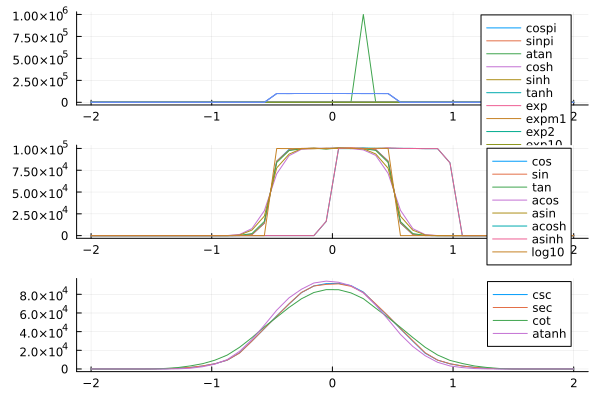

In [21]:
correct, faithfull, unfaithfull =  setupErrors(errors)
r =  range(-2, 2, length=40)
l = @layout [a ; b ; c]
p1 = plot(r, setupBuckets(correct), label=setupLabels(correct))
p2 = plot(r, setupBuckets(faithfull), label=setupLabels(faithfull))
p3 = plot(r, setupBuckets(unfaithfull), label=setupLabels(unfaithfull))
plot(p1, p2, p3, layout = l)

In [22]:
errors = []
for f in mpfrfunctions_symbol
  push!(errors, testRandomBatch(f, FloatingDistribution(domain(f)...), batchSize=1_000_000))
end

cos 100%|████████████████████████████████████████████████| Time: 0:00:01
sin 100%|████████████████████████████████████████████████| Time: 0:00:01
tan 100%|████████████████████████████████████████████████| Time: 0:00:01
sinpi 100%|██████████████████████████████████████████████| Time: 0:00:00
acos 100%|███████████████████████████████████████████████| Time: 0:00:00
atan 100%|███████████████████████████████████████████████| Time: 0:00:00
csc 100%|████████████████████████████████████████████████| Time: 0:00:01
sec 100%|████████████████████████████████████████████████| Time: 0:00:01
cot 100%|████████████████████████████████████████████████| Time: 0:00:01
acosh 100%|██████████████████████████████████████████████| Time: 0:00:03
asinh 100%|██████████████████████████████████████████████| Time: 0:00:02
exp10 100%|██████████████████████████████████████████████| Time: 0:00:01
log 100%|████████████████████████████████████████████████| Time: 0:00:02
log2 100%|█████████████████████████████████████████

cos  87%|██████████████████████████████████████████      |  ETA: 0:00:00

cos 100%|████████████████████████████████████████████████| Time: 0:00:02


sin  19%|█████████▎                                      |  ETA: 0:00:02

sin  39%|██████████████████▌                             |  ETA: 0:00:02

sin  58%|███████████████████████████▉                    |  ETA: 0:00:01

sin  78%|█████████████████████████████████████▎          |  ETA: 0:00:01

sin  97%|██████████████████████████████████████████████▋ |  ETA: 0:00:00

sin 100%|████████████████████████████████████████████████| Time: 0:00:02


tan  18%|████████▌                                       |  ETA: 0:00:02

tan  35%|████████████████▉                               |  ETA: 0:00:02

tan  53%|█████████████████████████▎                      |  ETA: 0:00:01

tan  70%|█████████████████████████████████▋              |  ETA: 0:00:01

tan  88%|██████████████████████████████████████████▏     |  ETA: 0:00:00

tan 100%|████████████████████████████████████████████████| Time: 0:00:02


cospi  62%|████████████████████████████▌                 |  ETA: 0:00:00

cospi 100%|██████████████████████████████████████████████| Time: 0:00:00


sinpi  47%|█████████████████████▍                        |  ETA: 0:00:01

sinpi  93%|██████████████████████████████████████████▊   |  ETA: 0:00:00

sinpi 100%|██████████████████████████████████████████████| Time: 0:00:01


acos  31%|██████████████▌                                |  ETA: 0:00:01

acos  62%|█████████████████████████████▏                 |  ETA: 0:00:01

acos  93%|███████████████████████████████████████████▊   |  ETA: 0:00:00

acos 100%|███████████████████████████████████████████████| Time: 0:00:01


asin  69%|████████████████████████████████▍              |  ETA: 0:00:00

asin 100%|███████████████████████████████████████████████| Time: 0:00:00


atan  45%|█████████████████████                          |  ETA: 0:00:01

atan  89%|█████████████████████████████████████████▉     |  ETA: 0:00:00

atan 100%|███████████████████████████████████████████████| Time: 0:00:01


csc  16%|███████▉                                        |  ETA: 0:00:03

csc  33%|███████████████▊                                |  ETA: 0:00:02

csc  49%|███████████████████████▊                        |  ETA: 0:00:02

csc  66%|███████████████████████████████▊                |  ETA: 0:00:01

csc  83%|███████████████████████████████████████▊        |  ETA: 0:00:01

csc  99%|███████████████████████████████████████████████▊|  ETA: 0:00:00

csc 100%|████████████████████████████████████████████████| Time: 0:00:03


sec  20%|█████████▊                                      |  ETA: 0:00:02

sec  41%|███████████████████▌                            |  ETA: 0:00:01

sec  61%|█████████████████████████████▏                  |  ETA: 0:00:01

sec  80%|██████████████████████████████████████▋         |  ETA: 0:00:01

sec 100%|████████████████████████████████████████████████| Time: 0:00:02


cot  13%|██████▏                                         |  ETA: 0:00:03

cot  28%|█████████████▍                                  |  ETA: 0:00:03

cot  43%|████████████████████▊                           |  ETA: 0:00:02

cot  58%|████████████████████████████                    |  ETA: 0:00:02

cot  70%|█████████████████████████████████▌              |  ETA: 0:00:01

cot  83%|███████████████████████████████████████▉        |  ETA: 0:00:01

cot  98%|███████████████████████████████████████████████▏|  ETA: 0:00:00

cot 100%|████████████████████████████████████████████████| Time: 0:00:03


cosh  94%|████████████████████████████████████████████   |  ETA: 0:00:00

cosh 100%|███████████████████████████████████████████████| Time: 0:00:00


sinh  87%|████████████████████████████████████████▊      |  ETA: 0:00:00

sinh 100%|███████████████████████████████████████████████| Time: 0:00:00


tanh  82%|██████████████████████████████████████▋        |  ETA: 0:00:00

tanh 100%|███████████████████████████████████████████████| Time: 0:00:00


acosh   9%|████▎                                         |  ETA: 0:00:05

acosh  18%|████████▌                                     |  ETA: 0:00:04

acosh  28%|████████████▊                                 |  ETA: 0:00:04

acosh  37%|█████████████████                             |  ETA: 0:00:03

acosh  46%|█████████████████████▏                        |  ETA: 0:00:03

acosh  55%|█████████████████████████▍                    |  ETA: 0:00:02

acosh  64%|█████████████████████████████▋                |  ETA: 0:00:02

acosh  74%|█████████████████████████████████▉            |  ETA: 0:00:01

acosh  83%|██████████████████████████████████████▏       |  ETA: 0:00:01

acosh  92%|██████████████████████████████████████████▍   |  ETA: 0:00:00

acosh 100%|██████████████████████████████████████████████| Time: 0:00:05


asinh  13%|██████                                        |  ETA: 0:00:03

asinh  26%|████████████                                  |  ETA: 0:00:03

asinh  39%|██████████████████                            |  ETA: 0:00:02

asinh  52%|████████████████████████                      |  ETA: 0:00:02

asinh  65%|██████████████████████████████                |  ETA: 0:00:01

asinh  78%|████████████████████████████████████          |  ETA: 0:00:01

asinh  91%|██████████████████████████████████████████    |  ETA: 0:00:00

asinh 100%|██████████████████████████████████████████████| Time: 0:00:03


atanh  76%|███████████████████████████████████▏          |  ETA: 0:00:00

atanh 100%|██████████████████████████████████████████████| Time: 0:00:00


exp  73%|███████████████████████████████████             |  ETA: 0:00:00

exp 100%|████████████████████████████████████████████████| Time: 0:00:00


expm1  66%|██████████████████████████████▍               |  ETA: 0:00:00

expm1 100%|██████████████████████████████████████████████| Time: 0:00:00


exp2  60%|████████████████████████████▎                  |  ETA: 0:00:00

exp2 100%|███████████████████████████████████████████████| Time: 0:00:00


exp10  27%|████████████▌                                 |  ETA: 0:00:01

exp10  54%|█████████████████████████                     |  ETA: 0:00:01

exp10  82%|█████████████████████████████████████▋        |  ETA: 0:00:00

exp10 100%|██████████████████████████████████████████████| Time: 0:00:01


log  11%|█████▎                                          |  ETA: 0:00:04

log  22%|██████████▌                                     |  ETA: 0:00:04

log  33%|███████████████▊                                |  ETA: 0:00:03

log  44%|█████████████████████                           |  ETA: 0:00:03

log  55%|██████████████████████████▎                     |  ETA: 0:00:02

log  66%|███████████████████████████████▋                |  ETA: 0:00:02

log  77%|████████████████████████████████████▉           |  ETA: 0:00:01

log  88%|██████████████████████████████████████████▏     |  ETA: 0:00:01

log  99%|███████████████████████████████████████████████▍|  ETA: 0:00:00

log 100%|████████████████████████████████████████████████| Time: 0:00:04


log2   9%|████▎                                          |  ETA: 0:00:05

log2  18%|████████▋                                      |  ETA: 0:00:04

log2  27%|████████████▉                                  |  ETA: 0:00:04

log2  37%|█████████████████▎                             |  ETA: 0:00:04

log2  46%|█████████████████████▌                         |  ETA: 0:00:03

log2  55%|█████████████████████████▊                     |  ETA: 0:00:02

log2  64%|██████████████████████████████▏                |  ETA: 0:00:02

log2  72%|██████████████████████████████████             |  ETA: 0:00:02

log2  82%|██████████████████████████████████████▍        |  ETA: 0:00:01

log2  91%|██████████████████████████████████████████▋    |  ETA: 0:00:01

log2 100%|██████████████████████████████████████████████▉|  ETA: 0:00:00

log2 100%|███████████████████████████████████████████████| Time: 0:00:05


log10   6%|██▋                                           |  ETA: 0:00:08

log10  11%|█████▏                                        |  ETA: 0:00:08

log10  17%|███████▊                                      |  ETA: 0:00:07

log10  22%|██████████▎                                   |  ETA: 0:00:07

log10  27%|████████████▌                                 |  ETA: 0:00:07

log10  32%|██████████████▊                               |  ETA: 0:00:07

log10  37%|█████████████████▏                            |  ETA: 0:00:06

log10  43%|███████████████████▋                          |  ETA: 0:00:06

log10  48%|██████████████████████                        |  ETA: 0:00:05

log10  53%|████████████████████████▌                     |  ETA: 0:00:05

log10  59%|███████████████████████████▏                  |  ETA: 0:00:04

log10  64%|█████████████████████████████▋                |  ETA: 0:00:03

log10  70%|████████████████████████████████▎             |  ETA: 0:00:03

log10  76%|██████████████████████████████████▊           |  ETA: 0:00:02

log10  81%|█████████████████████████████████████▍        |  ETA: 0:00:02

log10  87%|████████████████████████████████████████      |  ETA: 0:00:01

log10  92%|██████████████████████████████████████████▌   |  ETA: 0:00:01

log10  98%|█████████████████████████████████████████████▏|  ETA: 0:00:00

log10 100%|██████████████████████████████████████████████| Time: 0:00:09


log1p  23%|██████████▊                                   |  ETA: 0:00:02

log1p  45%|████████████████████▋                         |  ETA: 0:00:01

log1p  68%|███████████████████████████████▍              |  ETA: 0:00:01

log1p  92%|██████████████████████████████████████████▏   |  ETA: 0:00:00

log1p 100%|██████████████████████████████████████████████| Time: 0:00:02


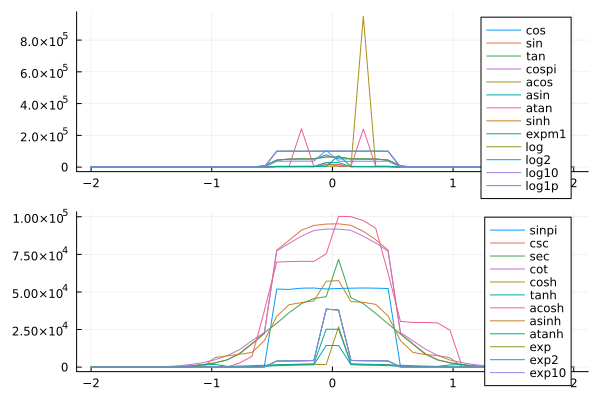

In [24]:
correct, faithfull, unfaithfull =  setupErrors(errors)
r =  range(-2, 2, length=40)
l = @layout [ b ; c]
#p1 = plot(r, setupBuckets(correct), label=setupLabels(correct))
p2 = plot(r, setupBuckets(faithfull), label=setupLabels(faithfull))
p3 = plot(r, setupBuckets(unfaithfull), label=setupLabels(unfaithfull))
plot(p2, p3, layout = l)

evaluar \gamma y FDR entre 1 y 2

[ ] Conceptos necesarios
[ ] Resultados